In [9]:
import pandas as pd

df = pd.read_csv('gym_members_exercise_tracking_synthetic_data.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [11]:
df['Max_BPM'] = df['Max_BPM'].str.extract(r'(\d+)')
df['Workout_Type'] = df['Workout_Type'].str.replace('\t', '', regex=True)
df['Workout_Type'] = df['Workout_Type'].str.replace('\n', '', regex=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [13]:
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   float64
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [14]:
from sklearn.impute import KNNImputer

numeric_data = df.select_dtypes(include=['number'])

imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(
    imputer.fit_transform(numeric_data), 
    columns=numeric_data.columns
)

categorical_data = df.select_dtypes(include=['object'])
categorical_data_imputed = categorical_data.apply(lambda col: col.fillna(col.mode()[0]))

df_imputed = pd.concat([numeric_data_imputed, categorical_data_imputed], axis=1)

In [15]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1800 non-null   float64
 1   Weight (kg)                    1800 non-null   float64
 2   Height (m)                     1800 non-null   float64
 3   Max_BPM                        1800 non-null   float64
 4   Avg_BPM                        1800 non-null   float64
 5   Resting_BPM                    1800 non-null   float64
 6   Session_Duration (hours)       1800 non-null   float64
 7   Calories_Burned                1800 non-null   float64
 8   Fat_Percentage                 1800 non-null   float64
 9   Water_Intake (liters)          1800 non-null   float64
 10  Workout_Frequency (days/week)  1800 non-null   float64
 11  Experience_Level               1800 non-null   float64
 12  BMI                            1800 non-null   f

In [16]:
df_imputed['BMI'] =  df_imputed['Weight (kg)'] / df_imputed['Height (m)'] ** 2

In [17]:
df_imputed.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type
0,34.0,86.7,1.86,174.0,152.0,74.0,1.12,712.0,12.8,2.4,5.0,2.0,25.060701,Female,Strength
1,26.0,84.7,1.83,166.0,156.0,73.0,1.00,833.0,27.9,2.8,5.0,2.0,25.291887,Female,Strength
2,22.0,64.8,1.85,187.0,166.0,64.0,1.24,1678.0,28.7,1.9,3.0,2.0,18.933528,Male,Cardio
3,54.0,75.3,1.82,187.0,169.0,58.0,1.45,628.0,31.8,2.4,4.0,1.0,22.732762,Female,Cardio
4,34.0,52.8,1.74,177.0,169.0,66.0,1.60,1286.0,26.4,3.2,4.0,2.0,17.439556,Female,Strength


In [18]:
df_imputed.to_csv('df_imputed.csv')

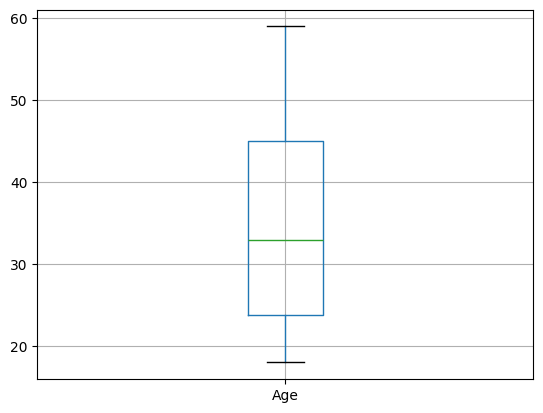

In [19]:
import matplotlib.pyplot as plt

df_imputed.boxplot(column=['Age'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Weight (kg)'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Height (m)'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Max_BPM'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Avg_BPM'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Resting_BPM'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Session_Duration (hours)'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Calories_Burned'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Fat_Percentage'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Water_Intake (liters)'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Workout_Frequency (days/week)'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['Experience_Level'])
plt.show()

In [ ]:
df_imputed.boxplot(column=['BMI'])
plt.show()

In [ ]:
plt.hist(df_imputed.Gender)
plt.show()

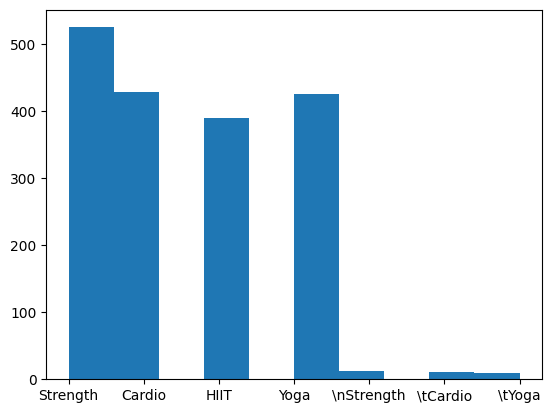

In [20]:
plt.hist(df_imputed.Workout_Type)
plt.show()